**Predicting Telecom Customer Churn  - One Hidden Layer V/S Two Hidden Layers**                                        Name: Amrutha Bharadwaj
Netid: ty9232                                                                                                                   

In [1]:
# Importing libraries

import tensorflow as tf
import pandas as pd
import numpy as np
from IPython import display
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import gridspec
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Error Logging

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

Using TensorFlow backend.


In [0]:
# Importing Data

churn_df = pd.read_csv("https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",")

In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.9,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,57.0,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.9,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [0]:
# Pre-processing the data

gender_value = {'Male': 0, 'Female': 1}
churn_df['gender'] = churn_df['gender'].map(gender_value).fillna(churn_df['gender'])

Partner_value = {'Yes': 1, 'No': 0}
churn_df['Partner'] = churn_df['Partner'].map(Partner_value).fillna(churn_df['Partner'])

Dependents_value = {'Yes': 1, 'No': 0}
churn_df['Dependents'] = churn_df['Dependents'].map(Dependents_value).fillna(churn_df['Dependents'])

PhoneService_value = {'Yes': 1, 'No': 0}
churn_df['PhoneService'] = churn_df['PhoneService'].map(PhoneService_value).fillna(churn_df['PhoneService'])

MultipleLines_value = {'Yes': 1, 'No': 0, 'No phone service' : 2}
churn_df['MultipleLines'] = churn_df['MultipleLines'].map(MultipleLines_value).fillna(churn_df['MultipleLines'])

InternetService_value = {'DSL': 1, 'No': 0, 'Fiber optic' : 2}
churn_df['InternetService'] = churn_df['InternetService'].map(InternetService_value).fillna(churn_df['InternetService'])

OnlineSecurity_value = {'Yes': 1, 'No': 0, 'No internet service' : 2}
churn_df['OnlineSecurity'] = churn_df['OnlineSecurity'].map(OnlineSecurity_value).fillna(churn_df['OnlineSecurity'])

OnlineBackup_value = {'Yes': 1, 'No': 0, 'No internet service' : 2}
churn_df['OnlineBackup'] = churn_df['OnlineBackup'].map(OnlineSecurity_value).fillna(churn_df['OnlineBackup'])

DeviceProtection_value = {'Yes': 1, 'No': 0, 'No internet service' : 2}
churn_df['DeviceProtection'] = churn_df['DeviceProtection'].map(DeviceProtection_value).fillna(churn_df['DeviceProtection'])

TechSupport_value = {'Yes': 1, 'No': 0, 'No internet service' : 2}
churn_df['TechSupport'] = churn_df['TechSupport'].map(TechSupport_value).fillna(churn_df['TechSupport'])

StreamingTV_value = {'Yes': 1, 'No': 0, 'No internet service' : 2}
churn_df['StreamingTV'] = churn_df['StreamingTV'].map(StreamingTV_value).fillna(churn_df['StreamingTV'])

StreamingMovies_value = {'Yes': 1, 'No': 0, 'No internet service' : 2}
churn_df['StreamingMovies'] = churn_df['StreamingMovies'].map(StreamingMovies_value).fillna(churn_df['StreamingMovies'])

Contract_value = {'One year': 1, 'Month-to-month': 0, 'Two year' : 2}
churn_df['Contract'] = churn_df['Contract'].map(Contract_value).fillna(churn_df['Contract'])

PaperlessBilling_value = {'Yes': 1, 'No': 0}
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'].map(PaperlessBilling_value).fillna(churn_df['PaperlessBilling'])

PaymentMethod_value = {'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)' : 3, 'Credit card (automatic)' : 4}
churn_df['PaymentMethod'] = churn_df['PaymentMethod'].map(PaymentMethod_value).fillna(churn_df['PaymentMethod'])

Churn_value = {'Yes': 1, 'No': 0}
churn_df['Churn'] = churn_df['Churn'].map(Churn_value).fillna(churn_df['Churn'])

In [0]:
churn_df = churn_df[churn_df.TotalCharges != " "]
churn_df[['TotalCharges']] = churn_df[['TotalCharges']].apply(pd.to_numeric)

In [7]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,1,29.9,29.9,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,2,57.0,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,2,53.9,108.2,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,3,42.3,1840.8,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,1,70.7,151.7,1


In [0]:
y = churn_df.Churn
X = churn_df.drop(['customerID','Churn'], axis=1)

In [9]:
print(churn_df.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
                     ...   
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
Length: 21, dtype: object


In [0]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [12]:
# Double-check that we've done the right thing.

print("X_train:")
display.display(X_train.describe())
print("y_train:")
display.display(y_train.describe())

print("X_test:")
display.display(X_test.describe())
print("y_test:")
display.display(y_test.describe())

X_train:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0,4922.0
mean,0.5,0.2,0.5,0.3,32.3,0.9,0.6,1.2,0.7,0.8,0.8,0.7,0.8,0.8,0.7,0.6,2.3,65.1,2297.2
std,0.5,0.4,0.5,0.5,24.5,0.3,0.7,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.5,1.1,30.1,2282.7
min,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.2,18.8
25%,0.0,0.0,0.0,0.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.1,390.0
50%,0.0,0.0,0.0,0.0,29.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,70.5,1416.3
75%,1.0,0.0,1.0,1.0,55.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,90.0,3778.1
max,1.0,1.0,1.0,1.0,72.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,118.8,8684.8


y_train:


count   4922.0
mean       0.3
std        0.4
min        0.0
25%        0.0
50%        0.0
75%        1.0
max        1.0
Name: Churn, dtype: float64

X_test:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0,2110.0
mean,0.5,0.2,0.5,0.3,32.6,0.9,0.6,1.2,0.7,0.8,0.8,0.7,0.8,0.8,0.7,0.6,2.3,64.2,2250.8
std,0.5,0.4,0.5,0.5,24.5,0.3,0.7,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.5,1.2,29.9,2229.4
min,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.8,18.9
25%,0.0,0.0,0.0,0.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.2,419.0
50%,0.0,0.0,0.0,0.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,70.2,1372.7
75%,1.0,0.0,1.0,1.0,56.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,89.6,3825.4
max,1.0,1.0,1.0,1.0,72.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,118.2,8547.1


y_test:


count   2110.0
mean       0.3
std        0.4
min        0.0
25%        0.0
50%        0.0
75%        1.0
max        1.0
Name: Churn, dtype: float64

In [0]:
# Creating Model with one hidden layer


# Building sequential model using kera API
model = Sequential()            
# Adding a densely-connected input layer with 64 units to the model: in densely connected, each node is connected to every other node and there are 64 neurons here
model.add(Dense(64, input_dim=len(X_train.columns), activation='relu'))
# Adding a hidden layer:
model.add(Dense(64, activation='relu'))
# Adding a sigmoid output layer with 1 output units:
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.30, epochs=50, batch_size=10, verbose=0)



# Creating Model with two hidden layers


# Building sequential model using kera API
model_two_hidden = Sequential()
# Adding a densely-connected input layer with 64 units to the model: in densely connected, each node is connected to every other node and there are 64 neurons here
model_two_hidden.add(Dense(64, input_dim=len(X_train.columns), activation='relu'))
# Adding 1st hidden layer:
model_two_hidden.add(Dense(64, activation='relu'))
# Adding 2nd hidden layer:
model_two_hidden.add(Dense(64, activation='relu'))
# Adding a sigmoid output layer with 1 output units:
model_two_hidden.add(Dense(1, activation='sigmoid'))
# Compile model
model_two_hidden.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history_two_hidden = model_two_hidden.fit(X_train, y_train, validation_split=0.30, epochs=50, batch_size=10, verbose=0)

In [19]:
# List all data in history of model with one hidden layer

print(history.history.keys())

model.summary()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1280      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [20]:
# List all data in history of model with two hidden layer 

print(history_two_hidden.history.keys())

model_two_hidden.summary()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                1280      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 9,665
Trainable params: 9,665
Non-trainable params: 0
_________________________________________________________________


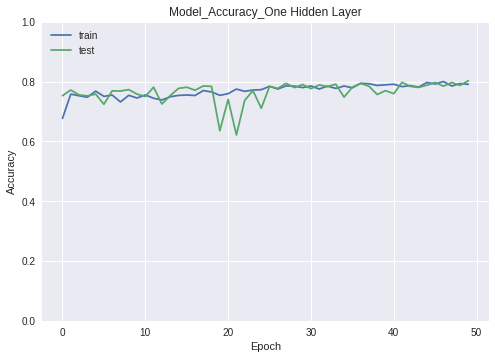

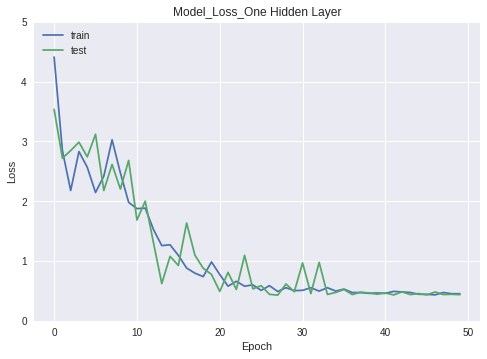

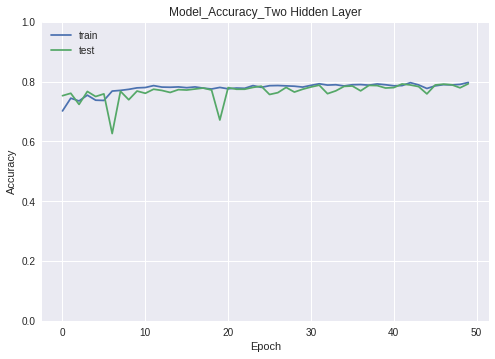

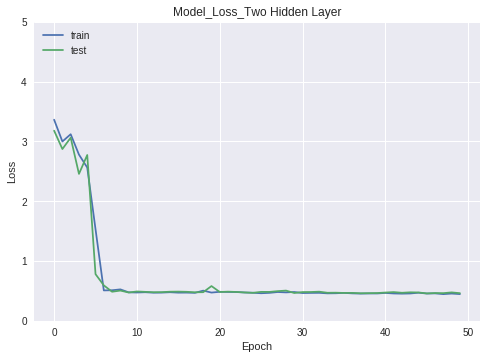

In [21]:
# Visualize training history of model with one hidden layer

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model_Accuracy_One Hidden Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Loss_One Hidden Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 5])
plt.show()


# Visualize training history of model with two hidden layers

# summarize history for accuracy
plt.plot(history_two_hidden.history['acc'])
plt.plot(history_two_hidden.history['val_acc'])
plt.title('Model_Accuracy_Two Hidden Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

# summarize history for loss
plt.plot(history_two_hidden.history['loss'])
plt.plot(history_two_hidden.history['val_loss'])
plt.title('Model_Loss_Two Hidden Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 5])
plt.show()

**MODEL COMPARISION: ** From the above 4 plots it is evident that having 2 hidden layers, enables the deep neural networks to perform better as it is capable of recognizing more deeper aspects of the input data. But, the downside is that it increases the computation task as compared to the network with one-hidden layer.

The first two plots show the plots with 1 hidden layer for accuracy and loss respectively. It can be seen that the line graph for training and test data doesn’t quite evenly match and there seems to be some variations. On a contrary, training and test data in graphs – 3 and 4, which are with 2-hidden layers, match evenly and prove that the neural network perform better as they can recognize more deeper aspects in all the 21 features of the input.